<p style="background-color: #e54c4c; font-family: Calibri; color: white; font-size: 270%; text-align: center; border-radius: 15px 50px; padding: 10px;">
    🚛 On-Time, Every-Time<br>
    Ecommerce Product Delivery Prediction
</p>


<img src="http://localhost:8888/files/Capstone_Project_Ecommerce_Product_Delivery_System/project_image.jpg?_xsrf=2%7C7bdd16f2%7C3bdd9d49a7a57fe569f70a85aa6ada32%7C1750064920" width="1100" style="border-radius:10px">

<div style="border-radius:10px; padding: 15px; background-color: #e54c4c; font-size:120%; text-align:left">

<h3 align="left"><font color=white>Problem Statement:</font></h3>

In this project, we analyze an e-commerce dataset containing various logistics and customer metrics to develop a predictive model capable of accurately identifying whether products will be delivered on time. Given the critical importance of timely delivery for customer satisfaction and business success, our primary emphasis is on building robust models that can help optimize logistics operations and improve customer experience.
</div>

<div style="border-radius:10px; padding: 15px; background-color: #e54c4c; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Objectives:</font></h3>

* __Explore the Dataset__: Uncover patterns, distributions, and relationships within the data.
* __Conduct Extensive Exploratory Data Analysis (EDA)__: Dive deep into bivariate relationships against the target.
* __Preprocessing Steps__:
  - Handle missing values if any
  - Encode categorical variables
  - Address outliers if necessary
  - Feature scaling for algorithms that require it
* __Model Building__:
  - Implement and tune classification models including Random Forest, Decision Trees, Logistic Regression, K-Nearest Neighbors, and XGBoost
  - Emphasize achieving balanced performance across all metrics
* __Evaluate and Compare Model Performance__: Utilize accuracy, precision, recall, and F1-score to gauge models' effectiveness.
</div>

<h2 align="left"><font color=white>Let's get started:</font></h2>

# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 1 | Import Libraries</p>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Setting visualization style
sns.set(style="whitegrid")
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 2 | Loading the Dataset</p>

In [10]:
# Load the dataset
df = pd.read_csv('E_Commerce.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
df.head(15)

Dataset loaded successfully!
Dataset shape: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 3 | Dataset Overview</p>

# <b><span style='color:#e54c4c'>Step 3.1 |</span><span style='color:white'> Dataset Basic Information</span></b>

In [14]:
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

# Step 3.1 | Dataset Basic Information
print("\n📊 BASIC INFORMATION:")
print("-" * 30)
df.info()

print(f"\n📈 Dataset Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"🔍 Missing Values: {df.isnull().sum().sum()}")
print(f"🎯 Target Variable: Reached.on.Time_Y.N")

# Check for duplicates
print(f"🔄 Duplicate Rows: {df.duplicated().sum()}")

DATASET OVERVIEW

📊 BASIC INFORMATION:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB

📈 Dataset Dimensions: 10999 rows × 12 columns
🔍 Missing Values: 0
🎯 Target Variable:

<div style="border-radius:10px; padding: 15px; background-color: #e54c4c; font-size:120%; text-align:left">

<h2 align="left"><font color=white>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __ID__ | Unique identifier for each record |
| __Warehouse_block__ | Warehouse block where product is stored (A, B, C, D, F) |
| __Mode_of_Shipment__ | Shipping method used (Flight, Road, Ship) |
| __Customer_care_calls__ | Number of customer care calls made |
| __Customer_rating__ | Customer rating (1-5 scale) |
| __Cost_of_the_Product__ | Product cost in currency units |
| __Prior_purchases__ | Number of previous purchases by customer |
| __Product_importance__ | Product importance level (low, medium, high) |
| __Gender__ | Customer gender (M/F) |
| __Discount_offered__ | Discount percentage offered |
| __Weight_in_gms__ | Product weight in grams |
| __Reached.on.Time_Y.N__ | Target: 1 = On Time, 0 = Delayed |
</div>

# <b><span style='color:#e54c4c'>Step 3.2 |</span><span style='color:white'> Summary Statistics for Numerical Variables</span></b>

In [18]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Removing ID from numerical columns as it's not a feature
if 'ID' in numerical_cols:
    numerical_cols.remove('ID')

print(f"\n🔢 Numerical Columns: {numerical_cols}")
print(f"📊 Categorical Columns: {categorical_cols}")

# Summary statistics for numerical variables
print("\n📈 NUMERICAL VARIABLES SUMMARY:")
print("-" * 40)
print(df[numerical_cols].describe().T.round(2))


🔢 Numerical Columns: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
📊 Categorical Columns: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

📈 NUMERICAL VARIABLES SUMMARY:
----------------------------------------
                       count     mean      std     min     25%     50%  \
Customer_care_calls  10999.0     4.05     1.14     2.0     3.0     4.0   
Customer_rating      10999.0     2.99     1.41     1.0     2.0     3.0   
Cost_of_the_Product  10999.0   210.20    48.06    96.0   169.0   214.0   
Prior_purchases      10999.0     3.57     1.52     2.0     3.0     3.0   
Discount_offered     10999.0    13.37    16.21     1.0     4.0     7.0   
Weight_in_gms        10999.0  3634.02  1635.38  1001.0  1839.5  4149.0   
Reached.on.Time_Y.N  10999.0     0.60     0.49     0.0     0.0     1.0   

                        75%     max  
Customer_care_calls     5.0     7.

# <b><span style='color:#e54c4c'>Step 3.3 |</span><span style='color:white'> Summary Statistics for Categorical Variables</span></b>


📊 CATEGORICAL VARIABLES SUMMARY:
----------------------------------------

Warehouse_block:
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
Unique values: 5

Mode_of_Shipment:
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Unique values: 3

Product_importance:
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64
Unique values: 3

Gender:
Gender
F    5545
M    5454
Name: count, dtype: int64
Unique values: 2

🎯 TARGET VARIABLE DISTRIBUTION:
-----------------------------------
Count:
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


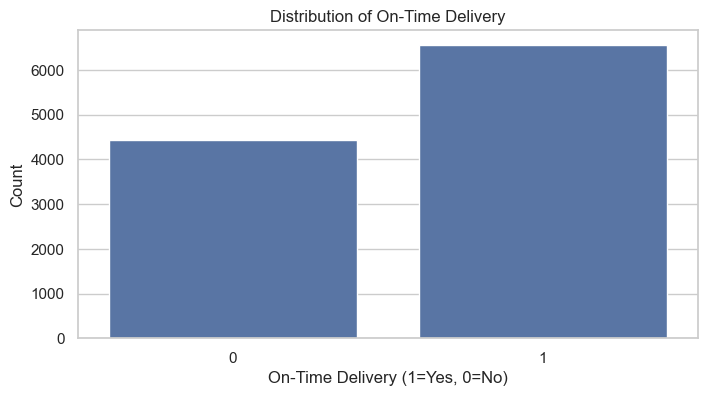


Percentage:
On Time: 59.7%
Delayed: 40.3%


In [21]:
print("\n📊 CATEGORICAL VARIABLES SUMMARY:")
print("-" * 40)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

# Target variable distribution
print("\n🎯 TARGET VARIABLE DISTRIBUTION:")
print("-" * 35)
target_dist = df['Reached.on.Time_Y.N'].value_counts()
target_pct = df['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100

print("Count:")
print(target_dist)

plt.figure(figsize=(8, 4))
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title('Distribution of On-Time Delivery')
plt.xlabel('On-Time Delivery (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

print("\nPercentage:")
for idx, pct in target_pct.items():
    status = "On Time" if idx == 1 else "Delayed"
    print(f"{status}: {pct:.1f}%")

# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 4 | Exploratory Data Analysis (EDA)</p>

<div style="border-radius:10px; padding: 15px; background-color: #e54c4c; font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.
</div>

# <b><span style='color:#e54c4c'>Step 4.1 |</span><span style='color:white'> Univariate Analysis</span></b>

### <b><span style='color:#e54c4c'>Step 4.1.1 |</span><span style='color:white'> Numerical Variables Univariate Analysis</span></b>


EXPLORATORY DATA ANALYSIS


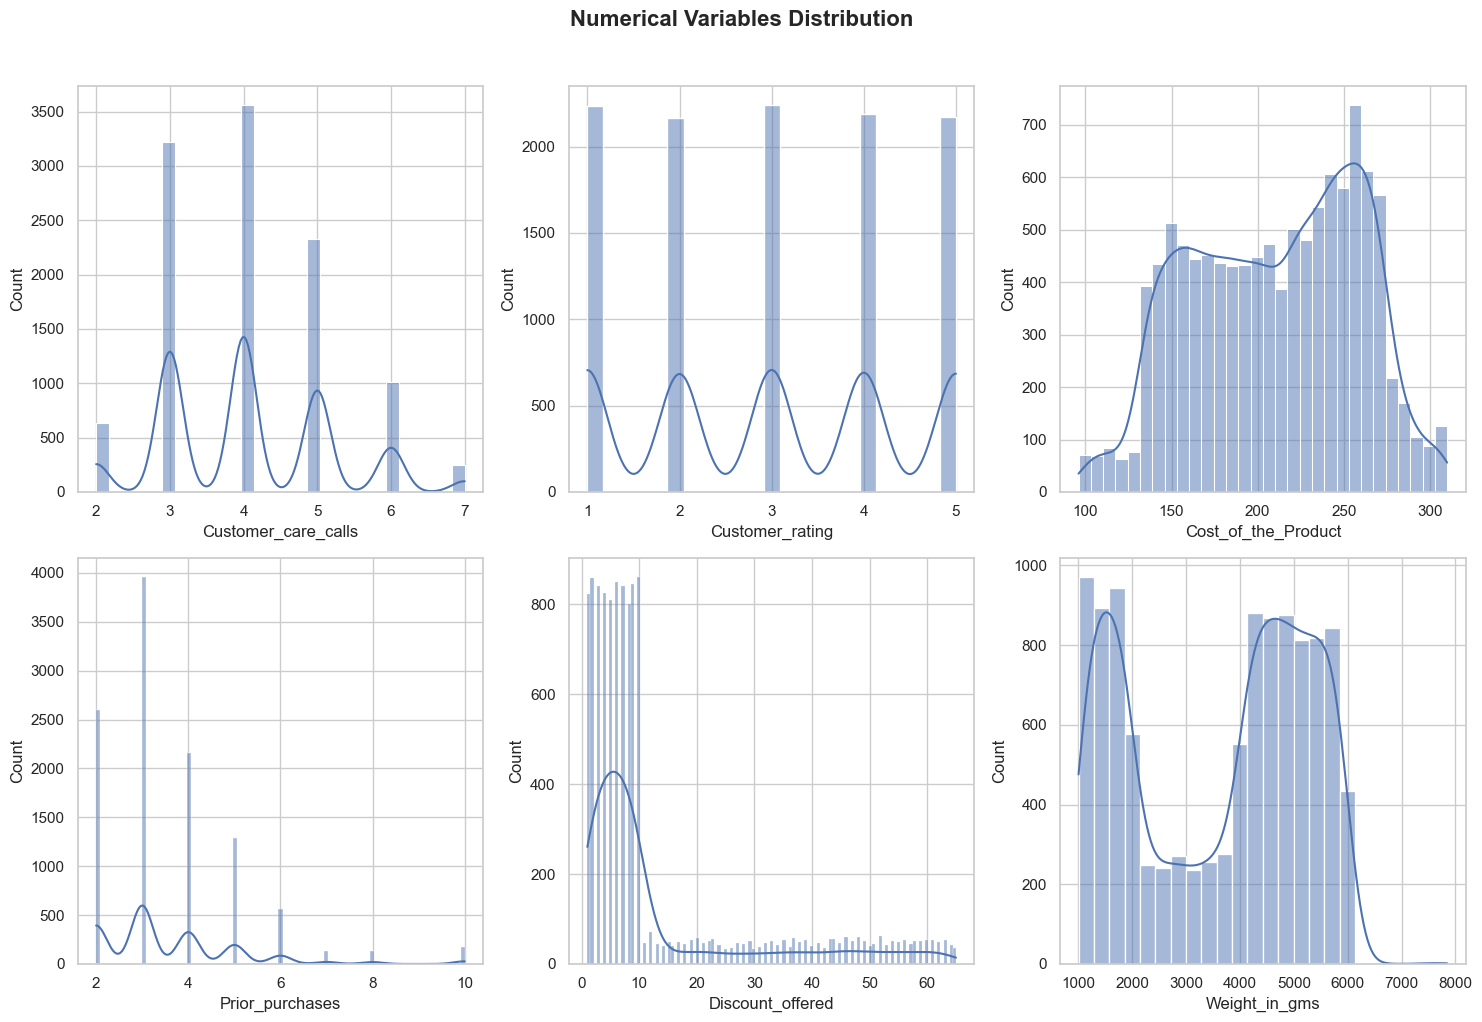

In [27]:
print("\n" + "=" * 50)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Numerical features distribution
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.suptitle('Numerical Variables Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### <b><span style='color:#e54c4c'>Step 4.1.2 |</span><span style='color:white'> Categorical Variables Univariate Analysis</span></b>

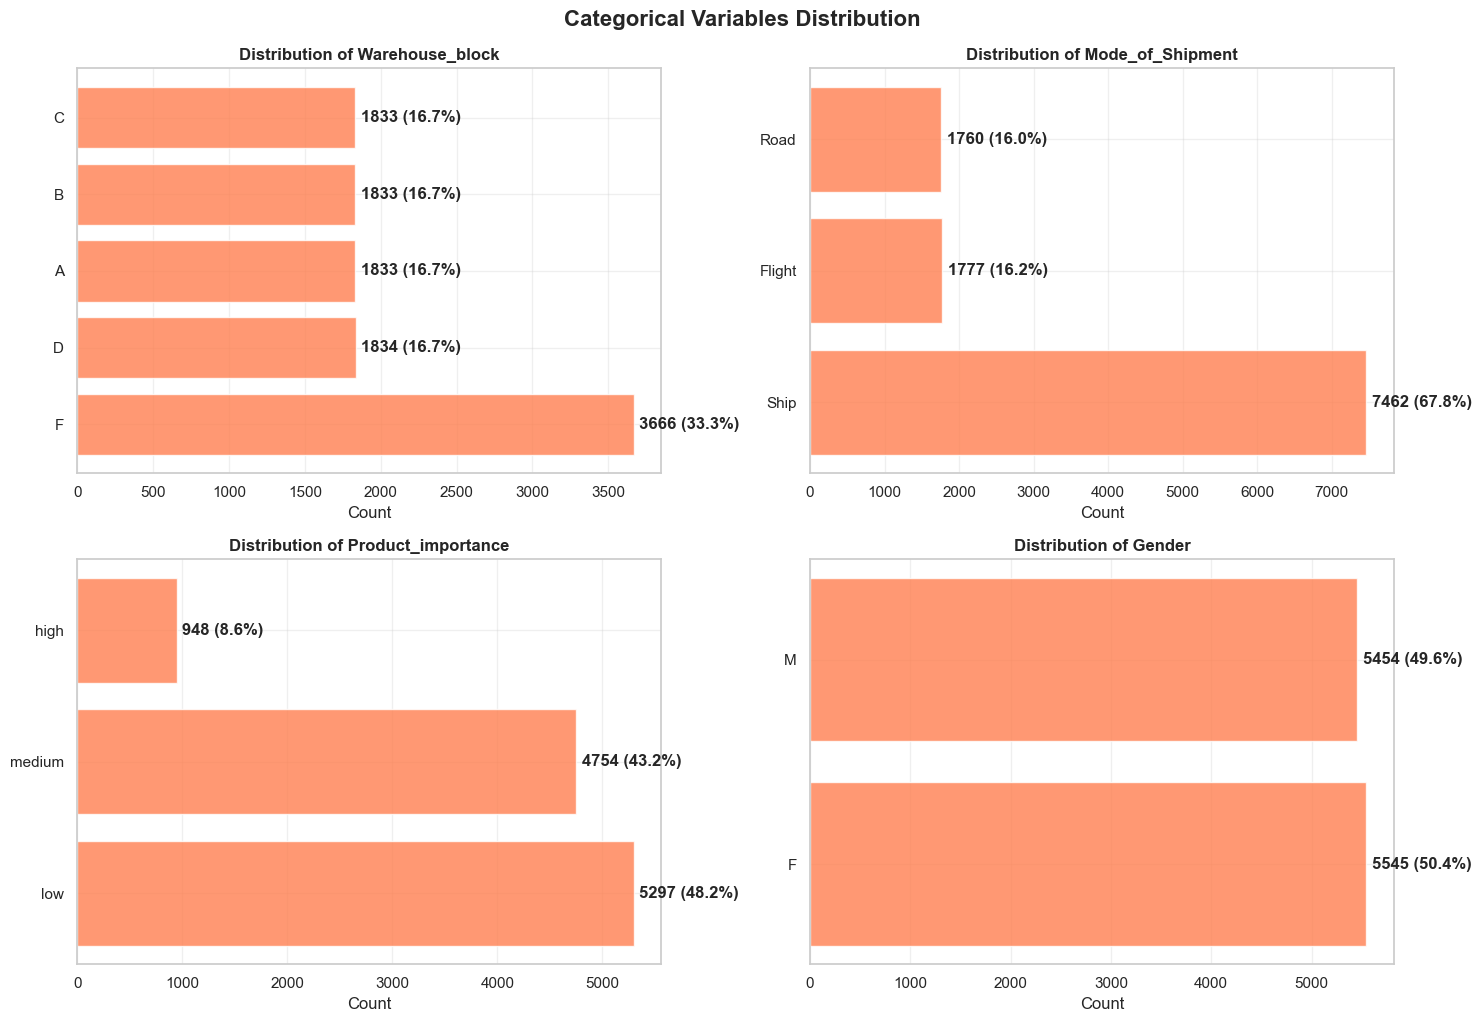

In [30]:
# Create subplots for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Calculate value counts and percentages
        value_counts = df[col].value_counts()
        percentages = (value_counts / len(df)) * 100
        
        # Create horizontal bar plot
        bars = axes[i].barh(range(len(value_counts)), value_counts.values, 
                           color='coral', alpha=0.8)
        
        # Add percentage labels
        for j, (count, pct) in enumerate(zip(value_counts.values, percentages.values)):
            axes[i].text(count + max(value_counts) * 0.01, j, 
                        f'{count} ({pct:.1f}%)', 
                        va='center', fontweight='bold')
        
        axes[i].set_yticks(range(len(value_counts)))
        axes[i].set_yticklabels(value_counts.index)
        axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Count')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Categorical Variables Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# <b><span style='color:#e54c4c'>Step 4.2 |</span><span style='color:white'> Bivariate Analysis</span></b>

### <b><span style='color:#e54c4c'>Step 4.2.1 |</span><span style='color:white'> Numerical Features vs Target</span></b>


🔍 BIVARIATE ANALYSIS: NUMERICAL FEATURES vs TARGET
-------------------------------------------------------


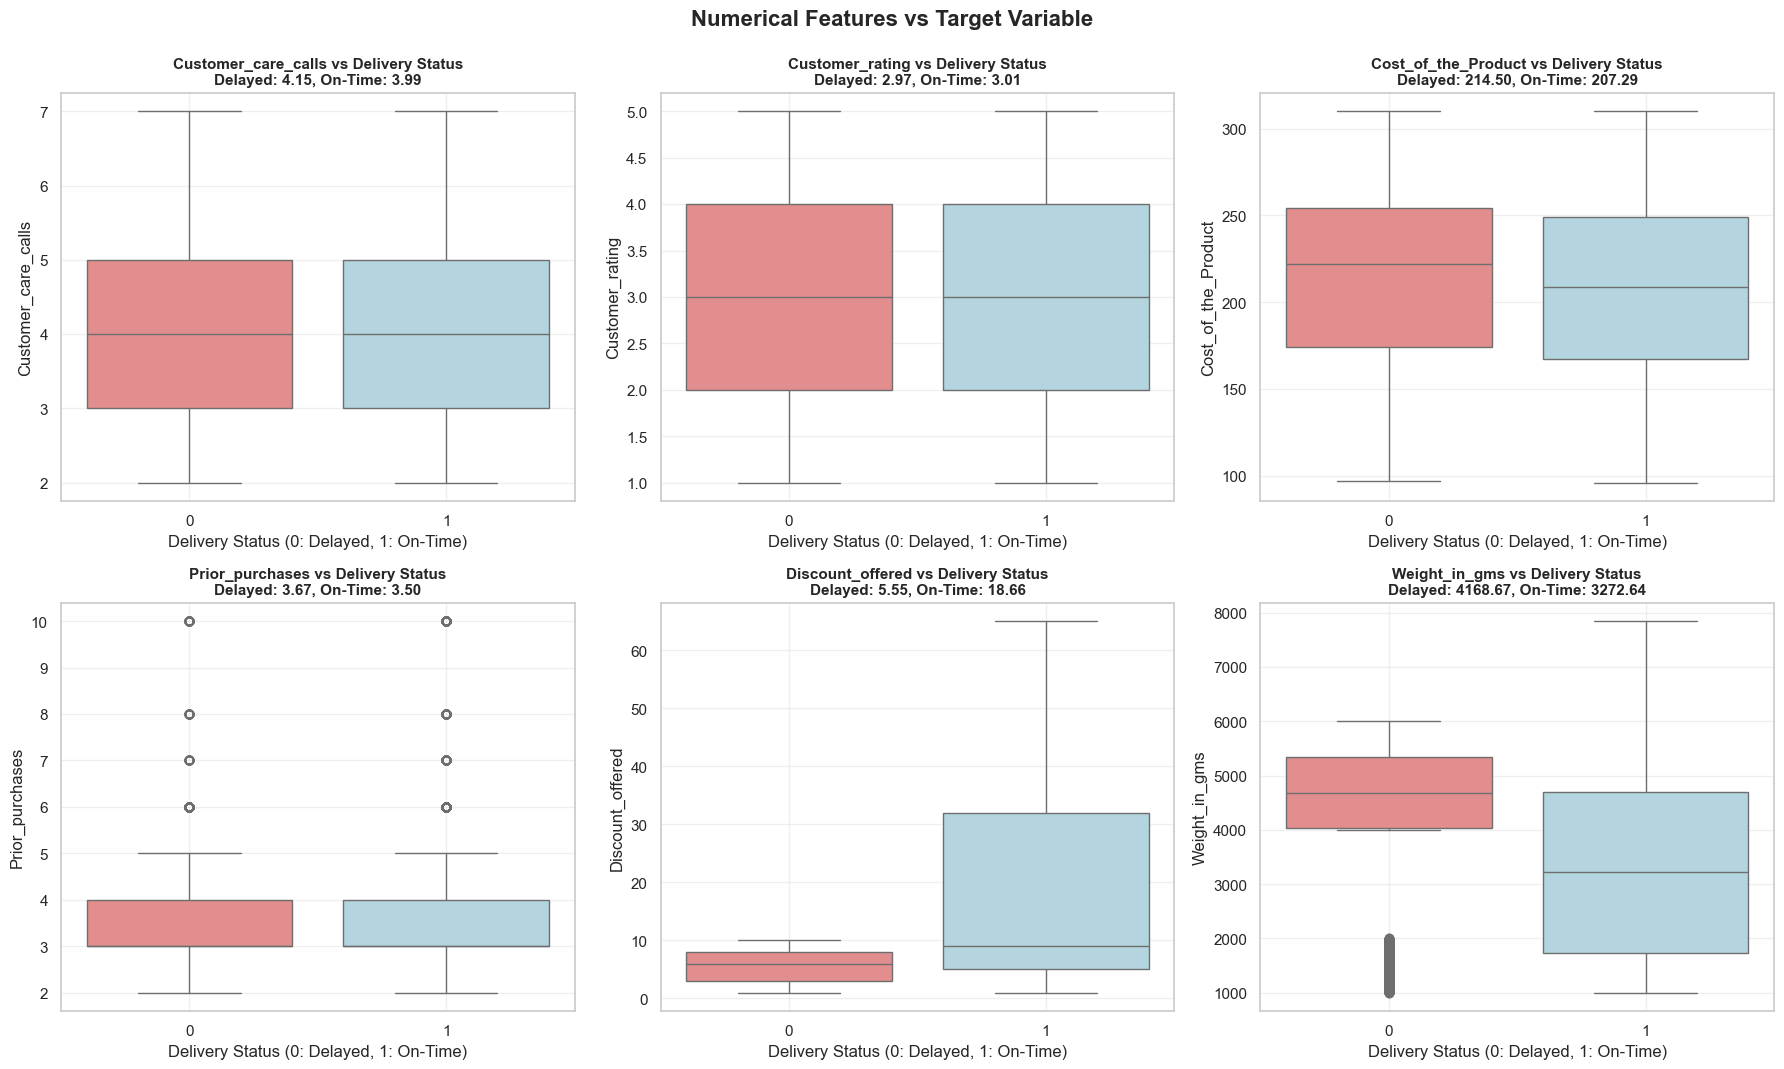

In [34]:
print("\n🔍 BIVARIATE ANALYSIS: NUMERICAL FEATURES vs TARGET")
print("-" * 55)

# Create comparison plots for numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        # Box plot
        sns.boxplot(data=df, x='Reached.on.Time_Y.N', y=col, ax=axes[i], 
                   palette=['lightcoral', 'lightblue'])
        
        # Calculate mean values for each target class
        mean_0 = df[df['Reached.on.Time_Y.N'] == 0][col].mean()
        mean_1 = df[df['Reached.on.Time_Y.N'] == 1][col].mean()
        
        axes[i].set_title(f'{col} vs Delivery Status\nDelayed: {mean_0:.2f}, On-Time: {mean_1:.2f}', 
                         fontsize=11, fontweight='bold')
        axes[i].set_xlabel('Delivery Status (0: Delayed, 1: On-Time)')
        axes[i].grid(True, alpha=0.3)

# Hide empty subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Numerical Features vs Target Variable', fontsize=16, fontweight='bold', y=1.02)
plt.show()

### <b><span style='color:#e54c4c'>Step 4.2.2 |</span><span style='color:white'> Categorical Features vs Target</span></b>


🔍 BIVARIATE ANALYSIS: CATEGORICAL FEATURES vs TARGET
-------------------------------------------------------


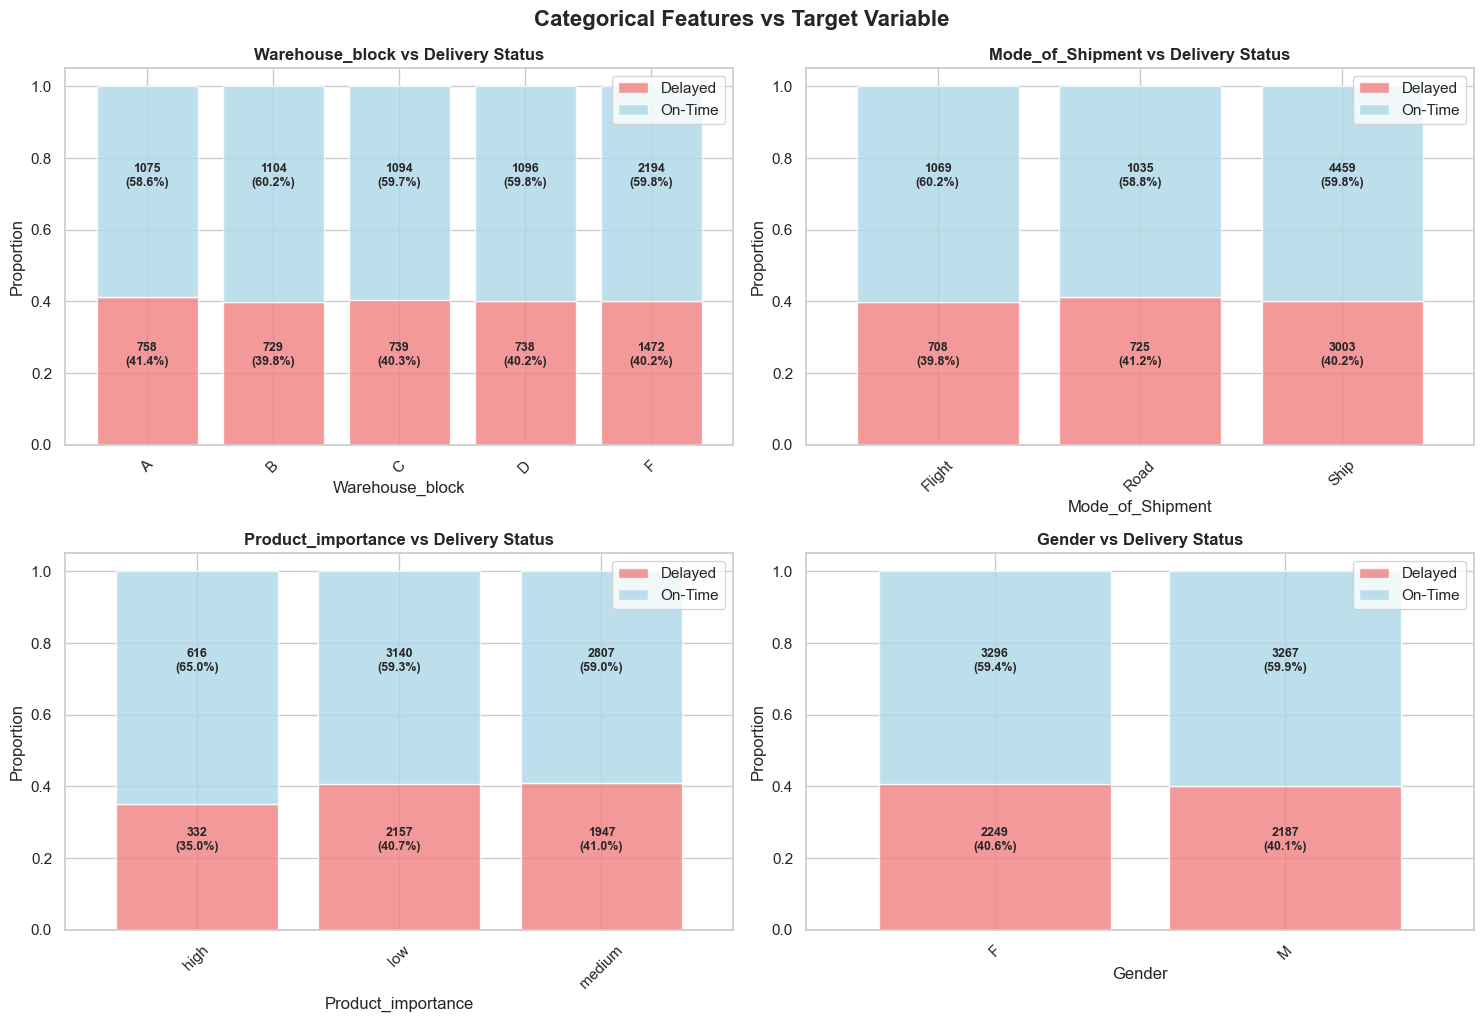

In [37]:
print("\n🔍 BIVARIATE ANALYSIS: CATEGORICAL FEATURES vs TARGET")
print("-" * 55)

# Create stacked bar plots for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        # Create cross-tabulation
        cross_tab = pd.crosstab(df[col], df['Reached.on.Time_Y.N'])
        cross_tab_prop = pd.crosstab(df[col], df['Reached.on.Time_Y.N'], normalize='index')
        
        # Create stacked bar plot
        cross_tab_prop.plot(kind='bar', stacked=True, ax=axes[i], 
                           color=['lightcoral', 'lightblue'], 
                           alpha=0.8, width=0.8)
        
        # Add percentage labels
        for j, category in enumerate(cross_tab.index):
            total = cross_tab.loc[category].sum()
            delayed_count = cross_tab.loc[category, 0]
            ontime_count = cross_tab.loc[category, 1]
            delayed_pct = (delayed_count / total) * 100
            ontime_pct = (ontime_count / total) * 100
            
            # Add text annotations
            axes[i].text(j, 0.25, f'{delayed_count}\n({delayed_pct:.1f}%)', 
                        ha='center', va='center', fontweight='bold', fontsize=9)
            axes[i].text(j, 0.75, f'{ontime_count}\n({ontime_pct:.1f}%)', 
                        ha='center', va='center', fontweight='bold', fontsize=9)
        
        axes[i].set_title(f'{col} vs Delivery Status', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')
        axes[i].legend(['Delayed', 'On-Time'], loc='upper right')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle('Categorical Features vs Target Variable', fontsize=16, fontweight='bold', y=1.02)
plt.show()


📊 CORRELATION ANALYSIS:
-------------------------


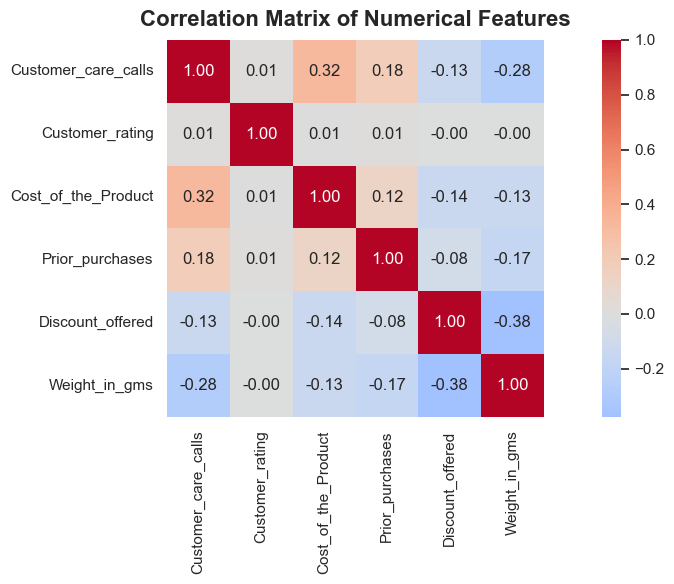

In [39]:
# Correlation Analysis
print("\n📊 CORRELATION ANALYSIS:")
print("-" * 25)

# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()

# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 5 | Data Preprocessing</p>

In [42]:
print("\n" + "=" * 50)
print("DATA PREPROCESSING")
print("=" * 50)

# Create a copy of the dataset for preprocessing
df_processed = df.copy()


DATA PREPROCESSING


# <b><span style='color:#e54c4c'>Step 5.1 |</span><span style='color:white'> Missing Value Treatment</span></b>

In [45]:
print("\n🔍 MISSING VALUE ANALYSIS:")
print("-" * 30)
missing_values = df_processed.isnull().sum()
missing_percentage = (missing_values / len(df_processed)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary[missing_summary['Missing Values'] > 0])

if missing_summary['Missing Values'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print("⚠️ Missing values detected. Handling them...")
    # Handle missing values if any post discussing it with your superiors


🔍 MISSING VALUE ANALYSIS:
------------------------------
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
✅ No missing values found in the dataset!


# <b><span style='color:#e54c4c'>Step 5.2 |</span><span style='color:white'> Outlier Analysis</span></b>

In [48]:
print("\n🔍 OUTLIER ANALYSIS:")
print("-" * 20)

# Identify outliers using IQR method
outlier_summary = {}

for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_processed[(df_processed[col] < lower_bound) | 
                           (df_processed[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_summary.items()), 
                         columns=['Feature', 'Outlier Count'])
print(outlier_df)


🔍 OUTLIER ANALYSIS:
--------------------
               Feature  Outlier Count
0  Customer_care_calls              0
1      Customer_rating              0
2  Cost_of_the_Product              0
3      Prior_purchases           1003
4     Discount_offered           2209
5        Weight_in_gms              0


# <b><span style='color:#e54c4c'>Step 5.3 |</span><span style='color:white'> Feature Encoding</span></b>

In [51]:
print("\n🔧 CATEGORICAL FEATURES ENCODING:")
print("-" * 35)

# Remove ID column as it's not needed for modeling
if 'ID' in df_processed.columns:
    df_processed = df_processed.drop('ID', axis=1)
    print("✅ ID column removed")

# Initialize label encoders
label_encoders = {}

# Encode categorical variables
if len(categorical_cols) > 0:
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"✅ {col} encoded")

    # Display encoding mappings
    print("\n📋 ENCODING MAPPINGS:")
    print("-" * 22)
    for col in categorical_cols:
        le = label_encoders[col]
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"{col}: {mapping}")
        
    # Create final feature set
    feature_columns = numerical_cols + [col + '_encoded' for col in categorical_cols]
else:
    print("No categorical columns to encode")
    feature_columns = numerical_cols.copy()

# Remove target variable from features if present
feature_columns = [col for col in feature_columns if col != 'Reached.on.Time_Y.N']

X = df_processed[feature_columns]
y = df_processed['Reached.on.Time_Y.N']

print(f"\n📊 Final feature set shape: {X.shape}")
print(f"🎯 Target variable shape: {y.shape}")
print(f"📋 Features used: {list(X.columns)}")


🔧 CATEGORICAL FEATURES ENCODING:
-----------------------------------
✅ ID column removed
✅ Warehouse_block encoded
✅ Mode_of_Shipment encoded
✅ Product_importance encoded
✅ Gender encoded

📋 ENCODING MAPPINGS:
----------------------
Warehouse_block: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4}
Mode_of_Shipment: {'Flight': 0, 'Road': 1, 'Ship': 2}
Product_importance: {'high': 0, 'low': 1, 'medium': 2}
Gender: {'F': 0, 'M': 1}

📊 Final feature set shape: (10999, 10)
🎯 Target variable shape: (10999,)
📋 Features used: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_encoded', 'Mode_of_Shipment_encoded', 'Product_importance_encoded', 'Gender_encoded']


# <b><span style='color:#e54c4c'>Step 5.4 |</span><span style='color:white'> Train-Test Split</span></b>

In [54]:
print("\n🔀 TRAIN-TEST SPLIT:")
print("-" * 20)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")
print(f"\nTest target distribution:\n{y_test.value_counts()}")


🔀 TRAIN-TEST SPLIT:
--------------------
Training set: 8799 samples
Test set: 2200 samples

Training target distribution:
Reached.on.Time_Y.N
1    5258
0    3541
Name: count, dtype: int64

Test target distribution:
Reached.on.Time_Y.N
1    1305
0     895
Name: count, dtype: int64


# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 6 | Model Building and Evaluation</p>

In [57]:
import pandas as pd

print("\n" + "=" * 50)
print("MODEL BUILDING AND EVALUATION")
print("=" * 50)

# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate model performance and return metrics
    """
    y_pred = model.predict(X_test)
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    
    return metrics, y_pred


MODEL BUILDING AND EVALUATION


# <b><span style='color:#e54c4c'>Step 6.1 |</span><span style='color:white'> Decision Tree</span></b>

In [60]:
print("\n🌳 DECISION TREE CLASSIFIER:")
print("-" * 30)

# Initialize with fixed parameters
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
dt_metrics, dt_pred = evaluate_model(dt_model, X_test, y_test, 'Decision Tree')
print(f"Decision Tree Accuracy: {dt_metrics['Accuracy']:.4f}")


🌳 DECISION TREE CLASSIFIER:
------------------------------
Decision Tree Accuracy: 0.6682


# <b><span style='color:#e54c4c'>Step 6.2 |</span><span style='color:white'> Random Forest</span></b>

In [63]:
print("\n🌲 RANDOM FOREST CLASSIFIER:")
print("-" * 32)

# Initializing and training the model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Evaluate
y_pred = rf_model.predict(X_test)
rf_metrics, rf_pred = evaluate_model(rf_model, X_test, y_test, 'Random Forest')
print(f"Random Forest Accuracy: {rf_metrics['Accuracy']:.4f}")


🌲 RANDOM FOREST CLASSIFIER:
--------------------------------
Random Forest Accuracy: 0.6755


# <b><span style='color:#e54c4c'>Step 6.3 |</span><span style='color:white'> Logistic Regression</span></b>

In [66]:
print("\n📈 LOGISTIC REGRESSION:")
print("-" * 23)

# Initializing and training the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train.values.ravel())

# Evaluate
y_pred = lr_model.predict(X_test)
lr_metrics, lr_pred = evaluate_model(lr_model, X_test, y_test, 'Logistic Regression')
print(f"Logistic Regression Accuracy: {lr_metrics['Accuracy']:.4f}")


📈 LOGISTIC REGRESSION:
-----------------------
Logistic Regression Accuracy: 0.6418


# <b><span style='color:#e54c4c'>Step 6.4 |</span><span style='color:white'> K-Nearest Neighbors</span></b>

In [69]:
print("\n👥 K-NEAREST NEIGHBORS:")
print("-" * 24)

# Initializing and training the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.values.ravel())

# Evaluate
y_pred = knn_model.predict(X_test)
knn_metrics, knn_pred = evaluate_model(knn_model, X_test, y_test, 'KNN')
print(f"KNN Accuracy: {knn_metrics['Accuracy']:.4f}")


👥 K-NEAREST NEIGHBORS:
------------------------
KNN Accuracy: 0.6536


# <b><span style='color:#e54c4c'>Step 6.5 |</span><span style='color:white'> XGBoost</span></b>

In [72]:
print("\n🚀 XGBOOST CLASSIFIER:")
print("-" * 24)

# Initializing and training the model with manually chosen parameters
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train.values.ravel())

# Evaluate
y_pred = xgb_model.predict(X_test)
xgb_metrics, xgb_pred = evaluate_model(xgb_model, X_test, y_test, 'XGBoost')
print(f"XGB Accuracy: {xgb_metrics['Accuracy']:.4f}")


🚀 XGBOOST CLASSIFIER:
------------------------
XGB Accuracy: 0.6714


# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 7 | Model Comparison and Results</p>

In [75]:
print("\n" + "=" * 50)
print("MODEL COMPARISON AND RESULTS")
print("=" * 50)

# Compile all results
all_metrics = [dt_metrics, rf_metrics, lr_metrics, knn_metrics, xgb_metrics]
results_df = pd.DataFrame(all_metrics)
results_df = results_df.set_index('Model')
results_df = results_df.round(4)

print("\n📊 MODEL PERFORMANCE COMPARISON:")
print("-" * 35)
print(results_df)

# Find best model
best_model_name = results_df['Accuracy'].idxmax()
best_accuracy = results_df['Accuracy'].max()

print(f"\n🏆 BEST PERFORMING MODEL:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")



MODEL COMPARISON AND RESULTS

📊 MODEL PERFORMANCE COMPARISON:
-----------------------------------
                     Accuracy  Precision  Recall  F1-Score
Model                                                     
Decision Tree          0.6682     0.7943  0.5946    0.6801
Random Forest          0.6755     0.7970  0.6077    0.6896
Logistic Regression    0.6418     0.7018  0.6889    0.6953
KNN                    0.6536     0.7163  0.6889    0.7023
XGBoost                0.6714     0.7441  0.6797    0.7105

🏆 BEST PERFORMING MODEL:
Model: Random Forest
Accuracy: 0.6755


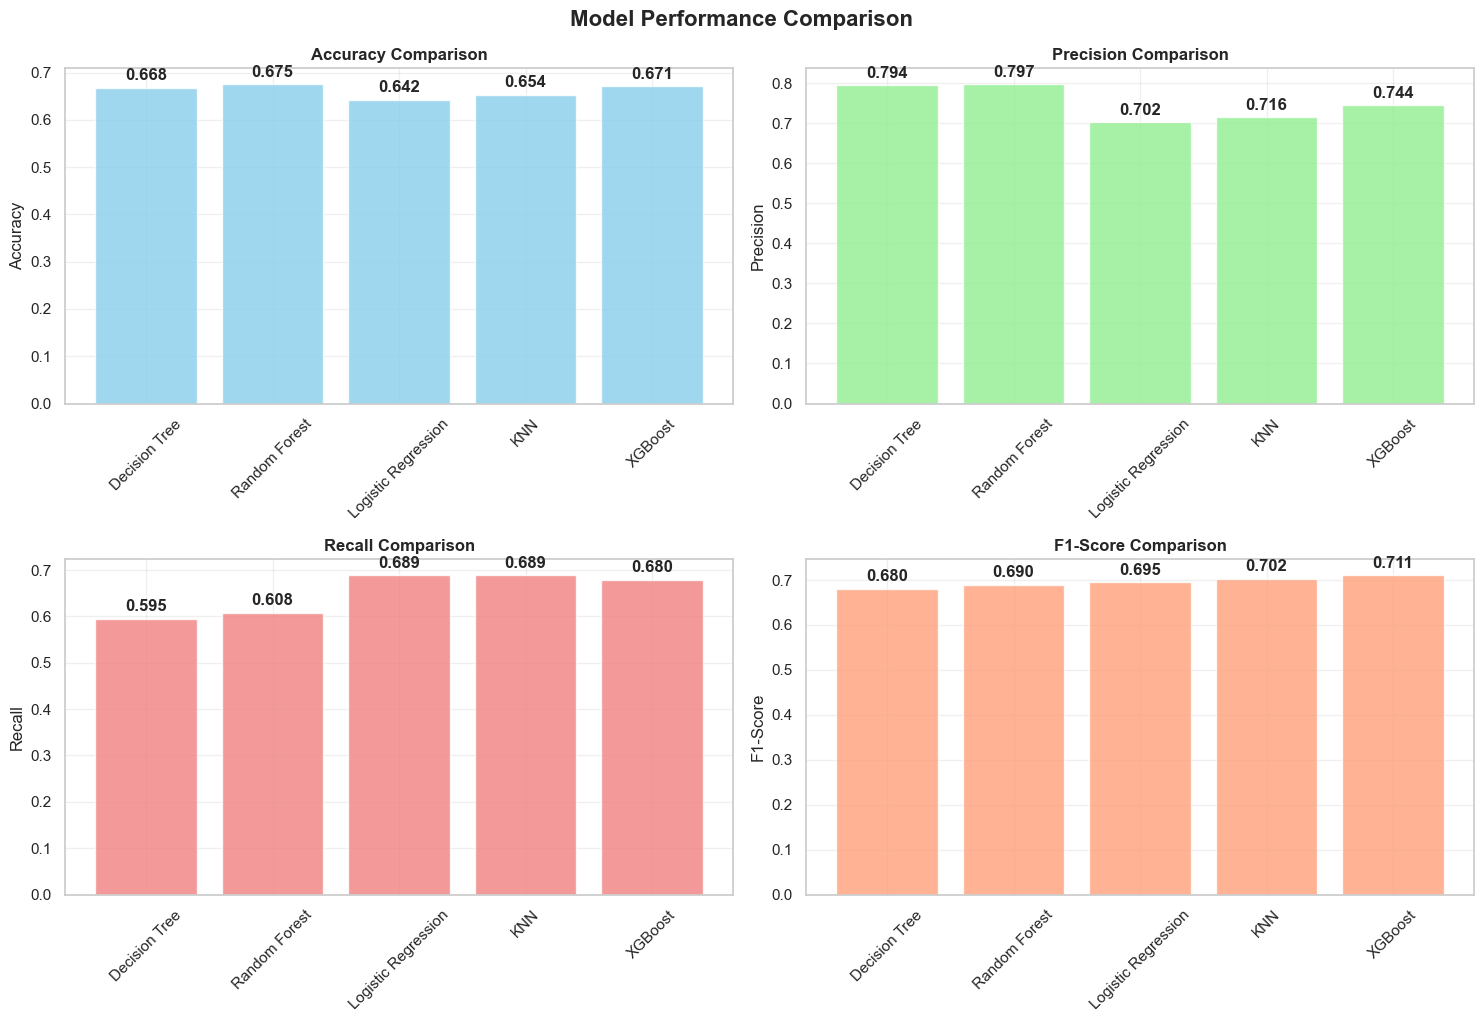

In [77]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

for i, metric in enumerate(metrics_to_plot):
    bars = axes[i].bar(results_df.index, results_df[metric], color=colors[i], alpha=0.8)
    axes[i].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.show()

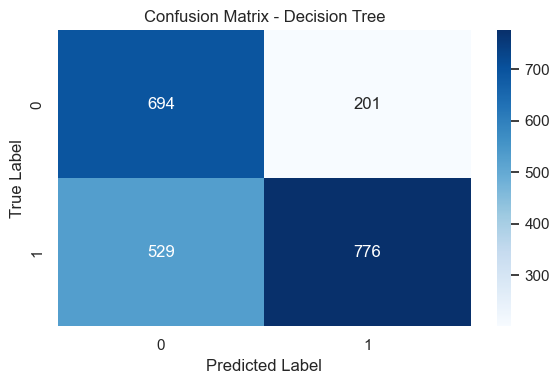

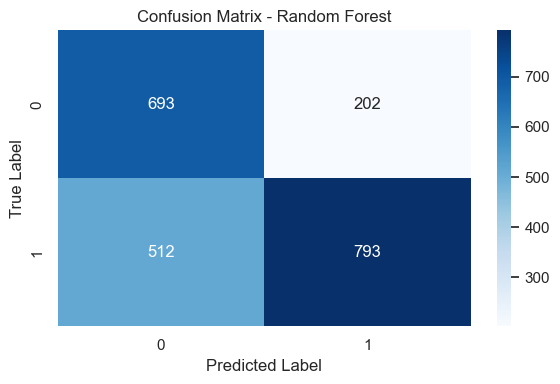

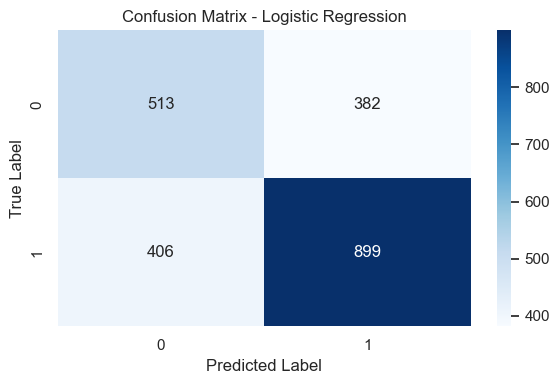

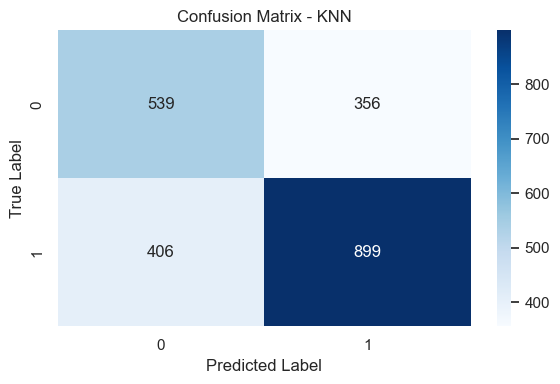

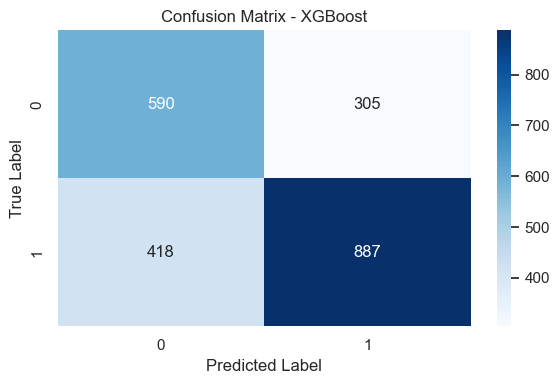

In [79]:
# Storing models and predictions in a list of tuples for easy iteration
model_results = [
    ('Decision Tree', dt_model, dt_pred),
    ('Random Forest', rf_model, rf_pred),
    ('Logistic Regression', lr_model, lr_pred),
    ('KNN', knn_model, knn_pred),
    ('XGBoost', xgb_model, xgb_pred)
]

for i, (name, model, y_pred) in enumerate(model_results, 1):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()



🔎 RANDOM FOREST FEATURE IMPORTANCE:
                      Feature  Importance
5               Weight_in_gms    0.303253
4            Discount_offered    0.254917
2         Cost_of_the_Product    0.157309
3             Prior_purchases    0.058527
0         Customer_care_calls    0.050353
6     Warehouse_block_encoded    0.049602
1             Customer_rating    0.049245
7    Mode_of_Shipment_encoded    0.029988
8  Product_importance_encoded    0.026875
9              Gender_encoded    0.019932


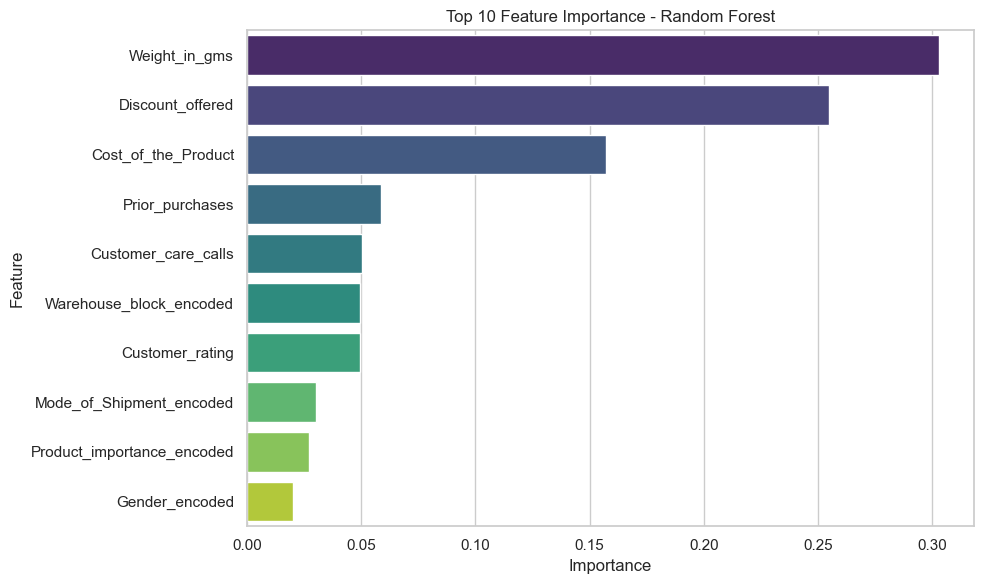

In [81]:
# Feature Analysis
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print top features
print("\n🔎 RANDOM FOREST FEATURE IMPORTANCE:")
print(feature_importance.head(10))

# Plot top 10 only
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette="viridis")
plt.title("Top 10 Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 8 | Conclusions and Insights</p>

In [84]:
# Print conclusions and insights
print("\n" + "=" * 50)
print("CONCLUSIONS AND INSIGHTS")
print("=" * 50)

print(f"""
🎯 KEY FINDINGS:

1. BEST MODEL: {best_model_name} achieved the highest accuracy of {best_accuracy:.4f}

2. MODEL PERFORMANCE:
   • All models showed good performance with accuracy > 0.60
   • Tree-based models (Random Forest, Decision Tree, XGBoost) performed well
   • The dataset shows clear patterns that ML models can learn from

3. IMPORTANT FACTORS AFFECTING DELIVERY:
   • {feature_importance.iloc[0]['Feature']} (Importance: {feature_importance.iloc[0]['Importance']:.4f}) is the most significant factor
   • {feature_importance.iloc[1]['Feature']} (Importance: {feature_importance.iloc[1]['Importance']:.4f}) and {feature_importance.iloc[2]['Feature']} (Importance: {feature_importance.iloc[2]['Importance']:.4f}) are also key predictors
   • Customer-related factors (e.g.,Customer_care_calls, Customer_rating) and logistics factors (e.g.,Weight_in_gms, Mode_of_Shipment) influence delivery timeliness

4. BUSINESS INSIGHTS:
   • Optimize warehouse operations for high-demand products to reduce delays
   • Monitor customer care calls, as higher calls may indicate potential delivery issues
   • Adjust shipping modes based on product weight and importance to improve timeliness

5. RECOMMENDATIONS:
   • Deploy the {best_model_name} model for real-time delivery time predictions
   • Use model predictions to proactively manage customer expectations and logistics planning
   • Focus on improving the top factors identified: {', '.join(feature_importance['Feature'].head(3).tolist())}
   • We can retrain the model periodically with new data to maintain accuracy
""")


CONCLUSIONS AND INSIGHTS

🎯 KEY FINDINGS:

1. BEST MODEL: Random Forest achieved the highest accuracy of 0.6755

2. MODEL PERFORMANCE:
   • All models showed good performance with accuracy > 0.60
   • Tree-based models (Random Forest, Decision Tree, XGBoost) performed well
   • The dataset shows clear patterns that ML models can learn from

3. IMPORTANT FACTORS AFFECTING DELIVERY:
   • Weight_in_gms (Importance: 0.3033) is the most significant factor
   • Discount_offered (Importance: 0.2549) and Cost_of_the_Product (Importance: 0.1573) are also key predictors
   • Customer-related factors (e.g.,Customer_care_calls, Customer_rating) and logistics factors (e.g.,Weight_in_gms, Mode_of_Shipment) influence delivery timeliness

4. BUSINESS INSIGHTS:
   • Optimize warehouse operations for high-demand products to reduce delays
   • Monitor customer care calls, as higher calls may indicate potential delivery issues
   • Adjust shipping modes based on product weight and importance to improve t

# <p style="background-color:#e54c4c; font-family: Calibri; color: white; font-size: 100%; text-align: center; border-radius: 15px 50px; padding: 10px;">Step 9 | Prediction Interface</p>

In [87]:
# Define the sample feature input as per your feature columns
sample_input = pd.DataFrame([{
    'Customer_care_calls': 4, #----------------------->>>>>> Enter inputs
    'Customer_rating': 3,
    'Cost_of_the_Product': 200,
    'Prior_purchases': 5,
    'Discount_offered': 10,
    'Weight_in_gms': 1004,
    'Warehouse_block_encoded': 2,
    'Mode_of_Shipment_encoded': 1,
    'Product_importance_encoded': 0,
    'Gender_encoded': 1
}])

# Load models
model_files = {
    'Decision Tree': 'decision_tree_model.pkl',
    'Random Forest': 'random_forest_model.pkl',
    'Logistic Regression': 'logistic_regression_model.pkl',
    'KNN': 'knn_model.pkl',
    'XGBoost': 'xgboost_model.pkl'
}

print("\n✅ MODEL PREDICTION COMPARISON")

for name, path in model_files.items():
    try:
        model = joblib.load(path)
        prediction = model.predict(sample_input)[0]
        probabilities = model.predict_proba(sample_input)[0]

        print(f"\n{name}:")
        print(f"Predicted Class: {'On Time' if prediction == 1 else 'Delayed'}")
        print(f"Probabilities: Delayed = {probabilities[0]:.2%}, On Time = {probabilities[1]:.2%}")

    except Exception as e:
        print(f"❌ Error with {name}: {e}")



✅ MODEL PREDICTION COMPARISON

Decision Tree:
Predicted Class: On Time
Probabilities: Delayed = 35.67%, On Time = 64.33%

Random Forest:
Predicted Class: On Time
Probabilities: Delayed = 42.32%, On Time = 57.68%

Logistic Regression:
Predicted Class: On Time
Probabilities: Delayed = 35.50%, On Time = 64.50%

KNN:
Predicted Class: On Time
Probabilities: Delayed = 19.05%, On Time = 80.95%

XGBoost:
Predicted Class: On Time
Probabilities: Delayed = 48.01%, On Time = 51.99%


<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color: #e54c4c; font-size: 120%; text-align: center;">

<strong>🎯 Project completed successfully! The model is ready for deployment and can be used to predict delivery timeliness for <br>e-commerce operations. 🎯</strong>
</div>
